The aim here is to predict rating for apps. In the first part, we are trying to train our model to predict rating for the apps which are paid apps and calculate the error rate for our trained model.
In the second part, we are trying to predict rating for the apps with our trained model for apps which are free initially and then are made paid. So, we are checking whether it's popularity remains the same.

Input dataset : https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#AppleStore.csv

In [1]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#Reading file for ios apps from AppleStore dataset

Path = r'C:\Users\Dhwani\Desktop\AppoMania\AppleStore.csv'
appleStoreDf = pd.read_csv(Path,parse_dates=True)
appleStoreDf.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
appleStoreDf.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [4]:
#checking for null values

appleStoreDf.isna().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [5]:
# Taking features which are required for rating prediction into a temporary dataset

lmDf = appleStoreDf[['user_rating','rating_count_tot','prime_genre','cont_rating','price']].copy()

In [6]:
lmDf.dtypes

user_rating         float64
rating_count_tot      int64
prime_genre          object
cont_rating          object
price               float64
dtype: object

In [7]:
lmDf.count()

user_rating         7197
rating_count_tot    7197
prime_genre         7197
cont_rating         7197
price               7197
dtype: int64

In [8]:
# Taking data where Price > 0 and rating > 0
#user_rating is average of all ratings of previous versions

lmDf['cont_rating'] = lmDf['cont_rating'].astype('object').str.replace('+', '')
lmDf['cont_rating'] = pd.to_numeric(lmDf['cont_rating'])
lmDf = lmDf[(lmDf.price != 0) & (lmDf.user_rating != 0.0)]
lmDf.count()

user_rating         2885
rating_count_tot    2885
prime_genre         2885
cont_rating         2885
price               2885
dtype: int64

In [9]:
lmDf.describe()

,user_rating,rating_count_tot,cont_rating,price
count,2885.000000,2885.000000,2885.000000,2885.000000
mean,4.051127,4396.896014,6.716811,3.958458
std,0.731145,26963.831705,3.863106,8.552687
min,1.000000,1.000000,4.000000,0.990000
25%,4.000000,52.000000,4.000000,1.990000
50%,4.000000,259.000000,4.000000,2.990000
75%,4.500000,1560.000000,9.000000,4.990000
max,5.000000,698516.000000,17.000000,299.990000


In [10]:
# Label encoding for prime_genre

from sklearn.preprocessing import LabelEncoder

y = lmDf[['user_rating']].copy()
X = lmDf.drop('user_rating',axis=1)

obj = LabelEncoder()
X["prime_genre"] = obj.fit_transform(X["prime_genre"].astype('object'))
X.head()

,rating_count_tot,prime_genre,cont_rating,price
0,21292,7,4,3.99
5,8253,7,4,0.99
8,1117,21,4,9.99
9,7885,7,4,3.99
10,76720,7,4,4.99


In [11]:
X.dtypes

rating_count_tot      int64
prime_genre           int64
cont_rating           int64
price               float64
dtype: object

In [12]:
X.count()

rating_count_tot    2885
prime_genre         2885
cont_rating         2885
price               2885
dtype: int64

In [15]:
#Spliting dataset into train and test data

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
Predict_rating_train = lm.predict(X_train)
Predict_rating_test = lm.predict(X_test)

In [17]:
ratingErrorTest = round(np.mean(np.subtract(Y_test.values,Predict_rating_test) ** 2),3)
print(ratingErrorTest)

0.534


In [18]:
ratingErrorTrain = round(np.mean(np.subtract(Y_train.values,Predict_rating_train) ** 2),3)
print(ratingErrorTrain)

0.523


In [19]:
print(lm.score(X_test,Y_test))

0.023274017460603424


In [20]:
print(lm.score(X_train,Y_train))

0.013695522645755243


# Let's test our trained model with the ratings of apps which are free for now

In [23]:
# Let's take rating for free apps

yFreeAppsRating = appleStoreDf['user_rating'][(appleStoreDf.price == 0) & (appleStoreDf.user_rating != 0)]

In [24]:
# Let's take features of the free apps

XFreeAppsFeatures = appleStoreDf[['user_rating','rating_count_tot','prime_genre','cont_rating','price']].copy()
XFreeAppsFeatures = XFreeAppsFeatures[(appleStoreDf.price == 0) & (appleStoreDf.user_rating != 0)]

XFreeAppsFeatures['cont_rating'] = XFreeAppsFeatures['cont_rating'].astype('object').str.replace('+', '')
XFreeAppsFeatures['cont_rating'] = pd.to_numeric(XFreeAppsFeatures['cont_rating'])

obj = LabelEncoder()
XFreeAppsFeatures["prime_genre"] = obj.fit_transform(XFreeAppsFeatures["prime_genre"].astype('object'))
XFreeAppsFeatures.head()

,user_rating,rating_count_tot,prime_genre,cont_rating,price
1,4.0,161065,15,4,0.0
2,3.5,188583,22,4,0.0
3,4.0,262241,17,12,0.0
4,4.5,985920,16,4,0.0
6,4.0,119487,5,4,0.0


In [25]:
XFreeAppsFeaturesTrain = XFreeAppsFeatures.drop(columns=['user_rating'])

In [26]:
# Let's take features of paid apps

XPaidAppsFeatures = appleStoreDf[['user_rating','rating_count_tot','prime_genre','cont_rating','price']].copy()
XPaidAppsFeatures = XPaidAppsFeatures[(appleStoreDf.price != 0) & (appleStoreDf.user_rating != 0)]

In [27]:
XPaidAppsFeatures.head()

,user_rating,rating_count_tot,prime_genre,cont_rating,price
0,4.0,21292,Games,4+,3.99
5,4.0,8253,Games,4+,0.99
8,4.5,1117,Utilities,4+,9.99
9,4.0,7885,Games,4+,3.99
10,4.5,76720,Games,4+,4.99


In [28]:
# Applying label encoding for prime_genre

XPaidAppsFeatures['cont_rating'] = XPaidAppsFeatures['cont_rating'].astype('object').str.replace('+', '')
XPaidAppsFeatures['cont_rating'] = pd.to_numeric(XPaidAppsFeatures['cont_rating'])

obj = LabelEncoder()
XPaidAppsFeatures["prime_genre"] = obj.fit_transform(XPaidAppsFeatures["prime_genre"].astype('object'))
XPaidAppsFeatures.head()

,user_rating,rating_count_tot,prime_genre,cont_rating,price
0,4.0,21292,7,4,3.99
5,4.0,8253,7,4,0.99
8,4.5,1117,21,4,9.99
9,4.0,7885,7,4,3.99
10,4.5,76720,7,4,4.99


In [29]:
XPaidAppsFeatures.count()

user_rating         2885
rating_count_tot    2885
prime_genre         2885
cont_rating         2885
price               2885
dtype: int64

In [30]:
yFreeAppsRating.count()

3383

In [31]:
XPaidAppsFeaturesTrain = XPaidAppsFeatures.drop(columns=['user_rating'])

In [32]:
# Training linear regression model with feature of paid apps

lm.fit(XPaidAppsFeaturesTrain,XPaidAppsFeatures.user_rating)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,0,'actual rating')

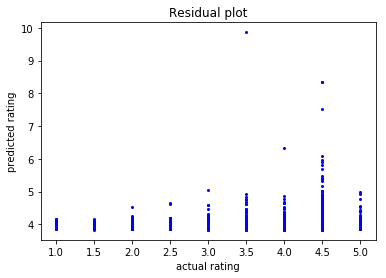

In [35]:
plt.scatter(yFreeAppsRating,lm.predict(XFreeAppsFeaturesTrain),c='b',s=4,alpha=1)

plt.title('Residual plot')
plt.ylabel('predicted rating')
plt.xlabel('actual rating')